# Read and plot outputs from Hercules/WHOC simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
# Read the output file #
df = pd.read_csv("outputs/hercules_output.csv", index_col=False)
display(df.head())

# Print out the column names of the output
print(df.columns)

,dt,hercules_comms.amr_wind.wind_farm_0.num_turbines,hercules_comms.amr_wind.wind_farm_0.rotor_diameter,hercules_comms.amr_wind.wind_farm_0.turbine_powers.000,hercules_comms.amr_wind.wind_farm_0.turbine_powers.001,hercules_comms.amr_wind.wind_farm_0.turbine_powers.002,hercules_comms.amr_wind.wind_farm_0.turbine_powers.003,hercules_comms.amr_wind.wind_farm_0.turbine_powers.004,hercules_comms.amr_wind.wind_farm_0.turbine_powers.005,hercules_comms.amr_wind.wind_farm_0.turbine_powers.006,...,py_sims.inputs.battery_signal,py_sims.inputs.sim_time_s,py_sims.inputs.solar_setpoint_mw,controller.num_turbines,controller.wind_capacity_MW,controller.solar_capacity_MW,external_signals.time,external_signals.plant_power_reference,time,clock_time
0,0.5,10,126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-50000.000000,0.0,50.0,10,50,100,0.5,75000.0,0.5,2024-07-16 12:38:57.960455
1,0.5,10,126.0,1155.250420,1155.190131,1155.184585,1155.250420,1155.190230,1155.184530,1155.250420,...,-35115.163452,0.5,50.0,10,50,100,1.0,75000.0,1.0,2024-07-16 12:38:58.081822
2,0.5,10,126.0,1748.488401,1748.397744,1748.389403,1748.488401,1748.397893,1748.389320,1748.488401,...,-29192.474892,1.0,50.0,10,50,100,1.5,75000.0,1.5,2024-07-16 12:38:58.200603
3,0.5,10,126.0,2041.439844,2041.334054,2041.324322,2041.439844,2041.334228,2041.324225,2041.439844,...,-26255.518240,1.5,50.0,10,50,100,2.0,75000.0,2.0,2024-07-16 12:38:58.318019
4,0.5,10,126.0,2184.248017,2184.134714,2184.124290,2184.248017,2184.134900,2184.124187,2184.248017,...,-24811.427905,2.0,50.0,10,50,100,2.5,75000.0,2.5,2024-07-16 12:38:58.442528


Index(['dt', 'hercules_comms.amr_wind.wind_farm_0.num_turbines',
       'hercules_comms.amr_wind.wind_farm_0.rotor_diameter',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.002',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.003',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.004',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.005',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.006',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.007',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.008',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.009',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.002',
  

### Plot the solar module outputs

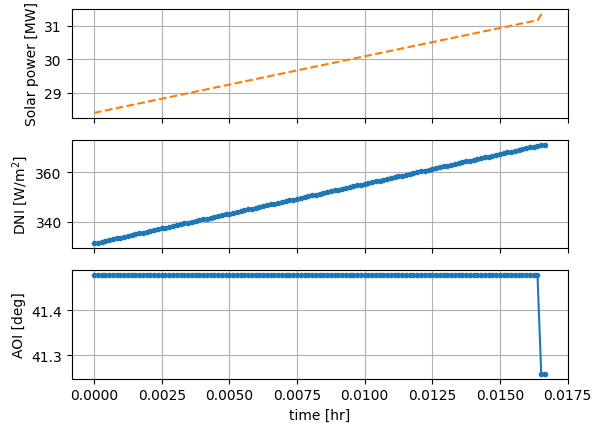

In [3]:
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]

if "external_signals.solar_power_reference_mw" in df.columns:
    power_setpoint = df["external_signals.solar_power_reference_mw"]
ac_power = df["py_sims.solar_farm_0.outputs.power_mw"]
angle_of_incidence = df["py_sims.solar_farm_0.outputs.aoi"]
direct_normal_irradiance = df["py_sims.solar_farm_0.outputs.dni"]

fig, ax = plt.subplots(3, 1, sharex="col")  # , figsize=[6,5], dpi=250)

if "external_signals.solar_power_reference_mw" in df.columns:
    ax[0].plot(time / 3600, power_setpoint, "-", linewidth=1, label='setpoint', color="C0")
ax[0].plot(time / 3600, ac_power, "--", label="power", color="C1")
ax[0].set_ylabel("Solar power [MW]")
ax[0].grid()

ax[1].plot(time / 3600, direct_normal_irradiance, ".-", label="irradiance")
ax[1].set_ylabel("DNI [W/m$^2$]")
ax[1].grid()

ax[2].plot(time / 3600, angle_of_incidence, ".-", label="aoi")
ax[2].set_ylabel("AOI [deg]")
ax[-1].set_xlabel("time [hr]")
ax[2].grid()

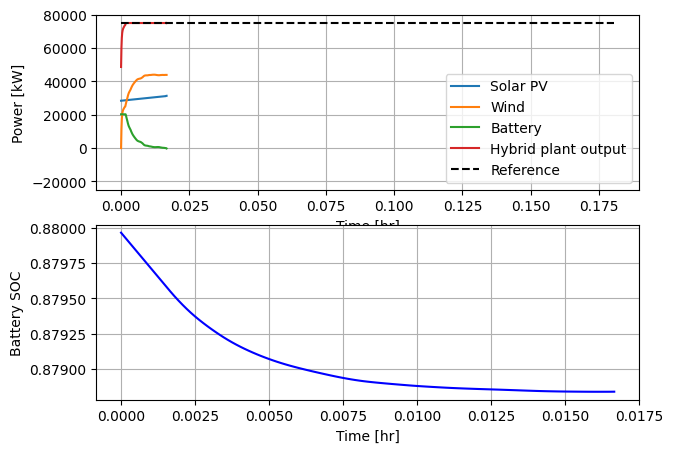

In [4]:
# Plot all plant outputs

# Load power reference signal given to the plant
power_ref_input = pd.read_csv("plant_power_reference.csv")

# Calculate total power output of the farm
power_output = (df["py_sims.inputs.available_power"]+\
    df["py_sims.solar_farm_0.outputs.power_mw"]*1000) \
    - df["py_sims.battery_0.outputs.power"]

#####
# # Uncomment if you want to look at individual turbine powers
# plt.figure()
# Nturb = 10
# for i in range(0,Nturb):
#     ending = "00"+str(i)
#     turbine_string = "hercules_comms.amr_wind.wind_farm_0.turbine_powers."+ending
#     plt.plot(time / 3600, df[turbine_string], label="WT"+ending)

# plt.ylabel("Power [kW]")
# plt.xlabel("Time [hr]")
# plt.legend()
#####

# Plotting power outputs from each technology as well as the total power output (top)
# Plotting the SOC of the battery (bottom)
plt.figure(figsize=(7,5))
top = plt.subplot(2,1,1)

top.plot(time / 3600, df["py_sims.solar_farm_0.outputs.power_mw"]*1000, label="Solar PV")
top.plot(time / 3600, df["py_sims.inputs.available_power"], label="Wind")
top.plot(time / 3600, -df["py_sims.battery_0.outputs.power"], label="Battery")
top.plot(time / 3600, power_output, label="Hybrid plant output")
top.plot(power_ref_input['time']/ 3600, power_ref_input['plant_power_reference'],\
            'k--', label="Reference")
top.set_ylabel("Power [kW]")
top.set_xlabel("Time [hr]")
top.set_ylim([ -25000, 80000])
top.grid()
top.legend()

bot = plt.subplot(2,1,2)
bot.plot(time / 3600, df["py_sims.battery_0.outputs.soc"], 'b')
bot.set_ylabel("Battery SOC")
bot.set_xlabel("Time [hr]")
bot.grid()

### Generate a new power reference, if desired

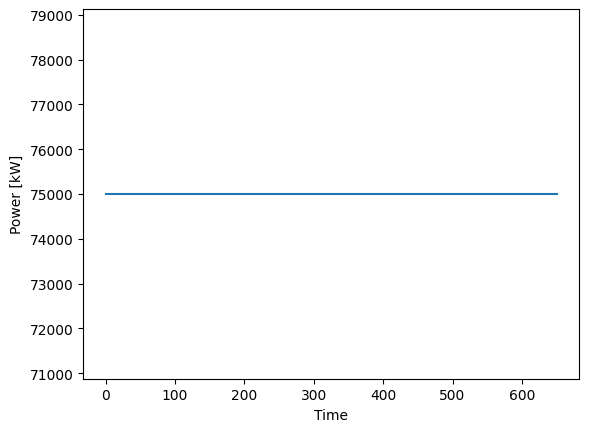

In [5]:
# Set power reference signal
power_value = 75000 # in kW
plant_power_reference = power_value*np.ones(203)

# Set time step
time = np.linspace(101.0, 650.0, num=200)
time = np.insert(time, 0, 100.0)
time = np.insert(time, 0,  10.0)
time = np.insert(time, 0, 0.0)

# Plot power reference signal for visual check

plt.figure()
plt.plot(time, plant_power_reference)
plt.ylabel("Power [kW]")
plt.xlabel("Time")
zipped = np.transpose([time, plant_power_reference])

#####
# # Uncomment these lines to save the power reference file as a csv file
# np.savetxt("plant_power_reference.csv", zipped, fmt='%1.4e', \
# delimiter=',', header="time,plant_power_reference", comments="")

# # Use this if you only want to give power reference to the wind farm
# np.savetxt("plant_power_reference.csv", zipped, fmt='%1.4e', \
# delimiter=',', header="time,wind_power_reference", comments="")
#####